In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [4]:
# Load the dataset
bank_df = pd.read_csv('/content/bank-full.csv',sep=";")
bank_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [5]:
# Check for missing values
print(bank_df.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [7]:
# Encode categorical variables using one-hot encoding
bank_df = pd.get_dummies(bank_df, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'])

In [8]:
# Scale numerical variables using StandardScaler
scaler = StandardScaler()
bank_df[['age', 'campaign', 'pdays', 'previous']] = scaler.fit_transform(bank_df[['age', 'campaign', 'pdays', 'previous']])
from sklearn.model_selection import train_test_split

In [9]:
# Split the data into features (X) and target (y)
X = bank_df.drop('y', axis=1)
y = bank_df['y']

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Create a decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

In [23]:
# Train the classifier on the training data
dt_classifier.fit(X_train, y_train)
, confusion_matrix

'confusion_matrix'

In [24]:
# Make predictions on the testing data
y_pred = dt_classifier.predict(X_test)

In [25]:
# Evaluate the classifier
from sklearn.metrics import classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
confusion_matrix(y_test, y_pred)
from sklearn.model_selection import GridSearchCV

Accuracy: 0.8734933097423422
Classification Report:
              precision    recall  f1-score   support

          no       0.93      0.93      0.93      7952
         yes       0.48      0.49      0.48      1091

    accuracy                           0.87      9043
   macro avg       0.70      0.71      0.71      9043
weighted avg       0.88      0.87      0.87      9043

Confusion Matrix:


In [26]:
# Define hyperparameter tuning space
param_grid = {'max_depth': [3, 5, 7], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 5, 10]}


In [27]:
# Perform grid search
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1_macro')

In [28]:
# Print the best hyperparameters and the corresponding score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Hyperparameters: {'max_depth': 7, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best Score: 0.7109868429371191


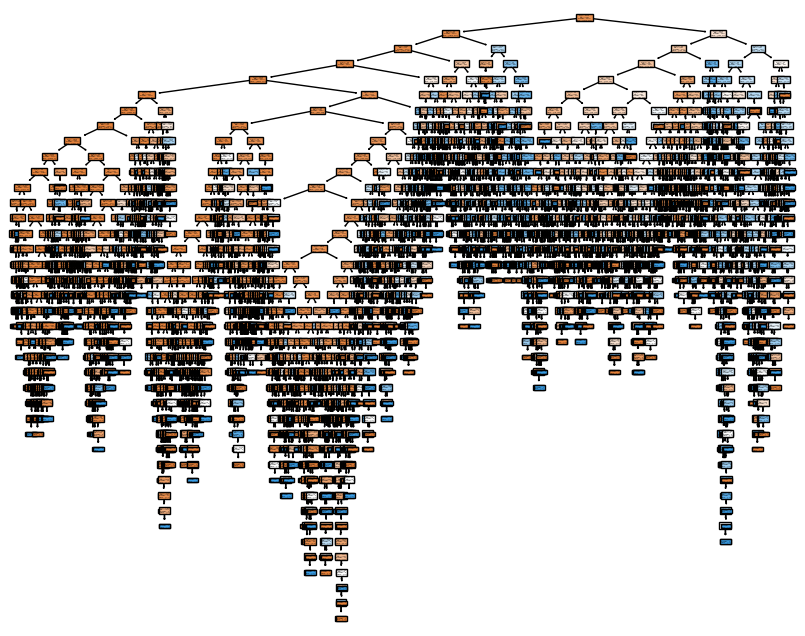

In [29]:
# Plot the decision tree
plt.figure(figsize=(10, 8))
plot_tree(dt_classifier, filled=True)
plt.show()